In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
import os
import random
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import image
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.svm import SVC
import cv2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
#pip install opencv-python

In [4]:
dir="C:/Users/Tara/OneDrive/Desktop/dataset2"
dir

'C:/Users/Tara/OneDrive/Desktop/dataset2'

In [5]:
categories=['Cats','Dog']

In [6]:
data=[]
labels=[]
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(dir, category)):
        img_path = os.path.join(dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)
        

In [7]:
data = np.asarray(data)
labels = np.asarray(labels)

In [8]:
data

array([[0.14705921, 0.24960464, 0.39863088, ..., 0.60129127, 0.56046459,
        0.49068426],
       [0.0906179 , 0.05838143, 0.04647595, ..., 0.39872419, 0.28750999,
        0.3572507 ],
       [0.00994539, 0.00994539, 0.00994539, ..., 0.96884088, 0.97980369,
        0.97721794],
       ...,
       [0.62056652, 0.57114416, 0.53277302, ..., 0.44719936, 0.43975817,
        0.44291352],
       [0.92917711, 0.90124061, 0.932775  , ..., 0.90129765, 0.87446438,
        0.84489346],
       [0.80443387, 0.56953381, 0.48808541, ..., 0.71653319, 0.67081624,
        0.66386698]])

In [9]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(data,labels,test_size=0.2, shuffle=True, stratify=labels)

In [11]:
model=SVC(C=10,kernel='poly',gamma=10)

In [12]:
model.fit(xtrain,ytrain)

SVC(C=10, gamma=10, kernel='poly')

In [13]:
y_pred = model.predict(xtest)

In [14]:
accuracy_score(y_pred,ytest)

0.5472636815920398

In [15]:
## Hyperparameter tunning
parameters = [{'gamma':[0.1,0.01,0.001], 'C': [10, 50, 100], 'kernel':['poly','rbf','sigmoid']}]

In [ ]:
grid_search = GridSearchCV(model, parameters)

In [ ]:
grid_search.fit(xtrain, ytrain)

In [18]:
best_estimator = grid_search.best_estimator_

In [19]:
best_estimator

SVC(C=50, gamma=0.001, kernel='poly')

In [20]:
y_pred2 = best_estimator.predict(xtest)

In [21]:
accuracy_score(y_pred2, ytest)

0.5406301824212272

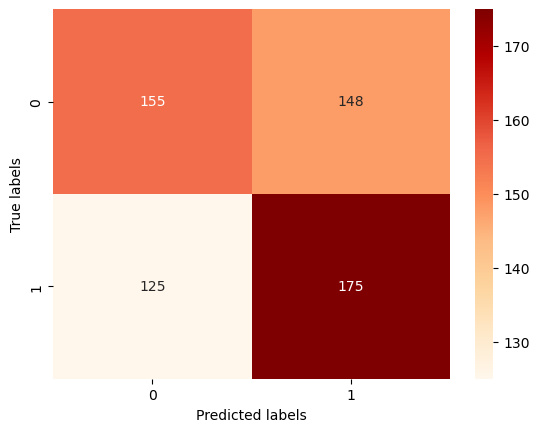

In [43]:
# Confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()